In [1]:
import oda_api.token 
import logging
import numpy as np
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage, OdaLightCurve, OdaSpectrum
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from matplotlib.patches import Circle
from astropy.time import Time

In [2]:
# token = ''
# token = getpass.getpass('Insert the token')
token = oda_api.token.discover_token() # get token stored locally

In [3]:
logging.getLogger().setLevel(logging.INFO) # WARNING, INFO or DEBUG
logging.getLogger('oda_api').addHandler(logging.StreamHandler())

Import the ScWs from the saved file.

In [4]:
scw_ids = []
scw_versions = []
scw_start_times = []
scw_end_times = []
jupiter_ra = []
jupiter_dec = []

with open("2004-01-01_2024-01-01.txt", "r") as f:
    next(f)
    for line in f:
        parts = line.strip().split(", ")
        scw_ids.append(parts[0])
        scw_versions.append(parts[1])
        scw_start_times.append(float(parts[2]))  
        scw_end_times.append(float(parts[3]))  
        jupiter_ra.append(float(parts[4]))  
        jupiter_dec.append(float(parts[5]))  


Add IDs and versions together to make correctly formatted ScWs, and compute durations of the ScW observations.

In [20]:
scw_list = [id + "." + ver for id, ver in zip(scw_ids, scw_versions)]
scw_durations = [(end - start)*24*60 for start, end in zip(scw_start_times, scw_end_times)]
print(scw_list)
print(scw_durations)
print([Time(start, format='mjd').isot for start in scw_start_times])
print("Max duration in minutes:", np.max(scw_durations), "at position", np.argmax(scw_durations))

['026601100010.001', '026601110010.001', '026700000210.001', '026700000230.001', '043200640010.001', '043200650010.001', '091700010010.001', '091700020010.001', '106300180010.001', '106300190010.001', '112600220010.001', '112600230010.001', '124200010010.001', '124200020010.001', '169500010010.001', '169500020010.001', '230200070010.001', '230200080010.001', '230200090010.001', '230200160010.001', '230200170010.001', '230200180010.001', '230200470010.001', '230200480010.001', '230200490010.001', '230200550010.001', '230200560010.001', '230200570010.001', '230200570020.001', '236600410010.001', '236600420010.001', '236600440010.001', '236600450010.001', '236600460010.001', '236600470010.001', '236600480010.001', '236600490010.001', '236600500010.001', '236600510010.001', '236600520010.001', '236600530010.001', '236600540010.001', '236600550010.001', '236600560010.001', '236600570010.001', '236600580010.001', '236600590010.001', '236600600010.001', '236600610010.001', '236600620010.001',

Query the ODA API.

In [ ]:
disp = DispatcherAPI(url="https://www.astro.unige.ch/mmoda/dispatch-data", instrument="mock")

list_position = 17 # 3, 198, 17

par_dict = {
"E1_keV": "15", # 15
"E2_keV": "30", # 30
"T_format": "isot",
"detection_threshold": "5", # for images
# "time_bin": "70", # for light curves
"instrument": "isgri",
# "osa_version": "OSA11.2",
"product": "isgri_image", # isgri_image or isgri_lc or isgri_spectrum
"product_type": "Real",
"scw_list": [scw_list[list_position]],
'token': token
}

data_collection = disp.get_product(**par_dict)
data_collection.show()

found token in TokenLocation.FILE_CUR_DIR your token payload: {
    "email": "hucklethums@icloud.com",
    "exp": 1741779981,
    "name": "interstellxr",
    "roles": "authenticated user, public-pool-hpc",
    "sub": "hucklethums@icloud.com"
}
token expires in 189.1 h
discovered token in environment
please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`
- waiting for remote response (since 2025-03-04 15:39:44), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis
session: DH3527QWRH508GCC job: e84691cbdddd80c2

... query status prepared => submitted
... assigned job id: e84691cbdddd80c2
 | the job is working remotely, please wait status=submitted job_id=e84691cb in 0 messages si

IMAGE

In [ ]:
data_collection.mosaic_image_0_mosaic.show()
print(data_collection.mosaic_image_0_mosaic.show_meta())

------------------------------
name: mosaic_image
meta_data dict_keys(['product', 'instrument', 'src_name', 'query_parameters'])
number of data units 6
------------------------------
data uniti 0 ,name: PRIMARY
data uniti 1 ,name: GROUPING
data uniti 2 ,name: ISGR-MOSA-IMA
data uniti 3 ,name: ISGR-MOSA-IMA
data uniti 4 ,name: ISGR-MOSA-IMA
data uniti 5 ,name: ISGR-MOSA-IMA
------------------------------
product : mosaic
instrument : isgri
src_name : 
query_parameters : None
------------------------------
None


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 53359.426435 from DATE-OBS.
Set MJD-END to 53359.449363 from DATE-END'. [astropy.wcs.wcs]
/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/oda_api/plot_tools.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


'./026700000230.001mosaic.fits'

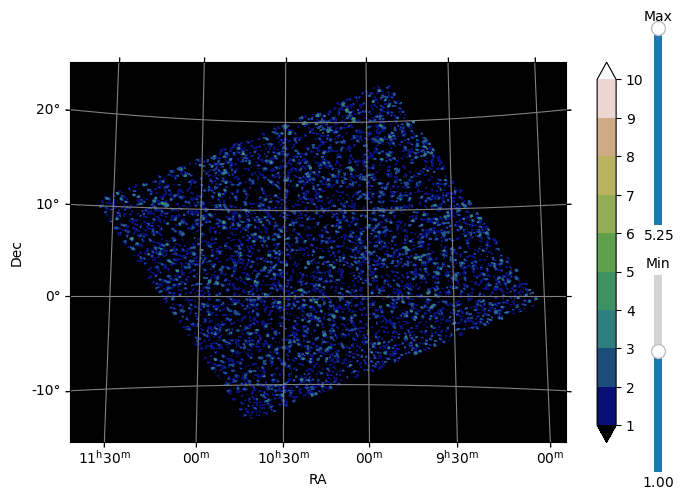

In [13]:
im=OdaImage(data_collection)
_ = im.show()
im.write_fits(f"{scw_ids[list_position]}"+f".{scw_versions[list_position]}")

Filename: 026700000230.001mosaic.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  GROUPING      1 BinTableHDU     82   4R x 16C   [8A, 32A, 1J, 1J, 256A, 3A, 32A, 1I, 1I, 1E, 1E, 1E, 1D, 1D, 1D, 1D]   
  2  ISGR-MOSA-IMA    1 ImageHDU        67   (543, 543)   float32   
  3  ISGR-MOSA-IMA    2 ImageHDU        67   (543, 543)   float32   
  4  ISGR-MOSA-IMA    3 ImageHDU        67   (543, 543)   float32   
  5  ISGR-MOSA-IMA    4 ImageHDU        67   (543, 543)   float32   


XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  543                                                  
NAXIS2  =                  543                                                  
PCOUNT  =                    0 / number o

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 53359.426435 from DATE-OBS.
Set MJD-END to 53359.449363 from DATE-END'. [astropy.wcs.wcs]
/tmp/ipykernel_1108/3110708561.py:24: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(image_data), cmap='plasma', origin='lower')
/tmp/ipykernel_1108/3110708561.py:24: RuntimeWarning: invalid value encountered in log10
  im = ax.imshow(np.log10(image_data), cmap='plasma', origin='lower')


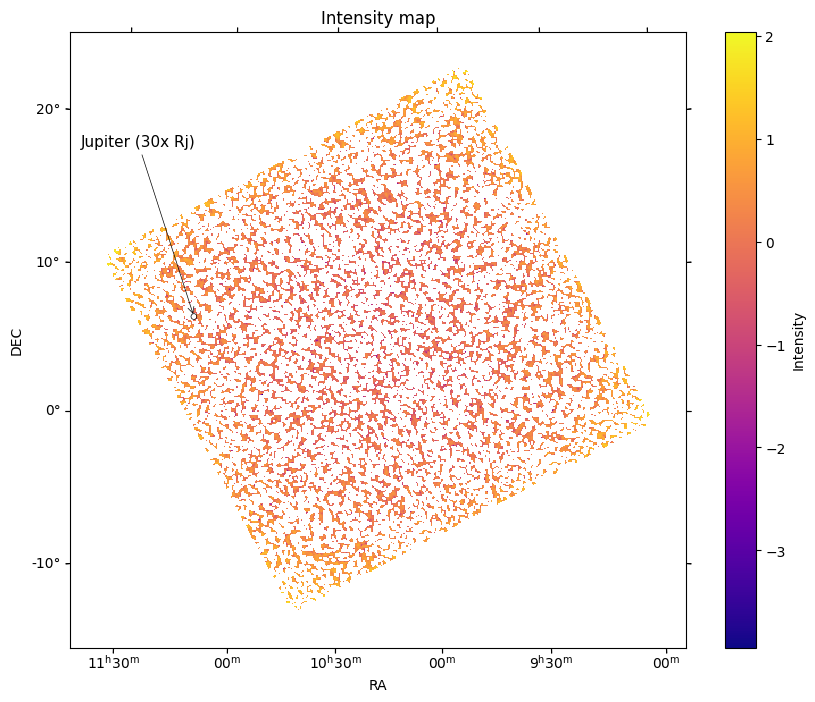

In [ ]:
from astropy.wcs import WCS
from matplotlib.patches import Circle

fits_file = f"{scw_list[list_position]}"+"mosaic.fits"

pick = 2 # 2 for image, 3 for variance, 4 for significance and 5 for exposure map

# Jupiter
ra_deg = jupiter_ra[list_position]
dec_deg = jupiter_dec[list_position]

with fits.open(fits_file) as hdul:
    hdul.info()
    image_data = hdul[pick].data 
    print("\n")
    print(repr(hdul[pick].header))
    print("\n")
    wcs = WCS(hdul[pick].header)  
    CD1 = np.abs(hdul[pick].header["CD1_1"])

x, y = wcs.all_world2pix(ra_deg, dec_deg, 1)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=wcs)
im = ax.imshow(np.log10(image_data), cmap='plasma', origin='lower')

ax.set_xlabel('RA')
ax.set_ylabel('DEC')

pixel_scale = CD1 * 3600  # pixel size in arcseconds (|CD1_1| from fits header)
circle_radius_pixels = 30 * 40 / pixel_scale / 2  # radius in pixels (30 times Jupiter's apparent size which is ~ 40")

circle = Circle((x, y), circle_radius_pixels, edgecolor='black', facecolor='none', lw = 0.5)
ax.add_patch(circle)

title = ""
if pick == 2:
    title = "Intensity"
elif pick == 3:
    title = "Variance"
elif pick == 4:
    title = "Significance"
elif pick == 5:
    title = "Exposure"

plt.title(title+" map")
plt.colorbar(im, label="Intensity")

ax.annotate(
    text="Jupiter (30x Rj)", 
    xy=(x, y),  
    xytext=(x - 100, y + 150),
    arrowprops=dict(arrowstyle="->", color="black", lw=0.5),
    fontsize=11,
    color="black"
)

plt.savefig(f"{scw_list[list_position]}"+"_"+f"{title}.pdf", format='pdf', bbox_inches='tight')